# Medical Insurance Premium Predictions

Project solution for Coursera Project to predict Insurance Premium cost using BMI, Sex, Children, Smoking Habits, and Region as predictors.

Guided Project:  [![Coursera](https://img.shields.io/badge/Coursera-%230056D2.svg?style=for-the-badge&logo=Coursera&logoColor=white)](https://www.coursera.org/projects/medical-insurance-premium-prediction-with-machine-learning) 

## Import Libraries and Dataset

In [8366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8367]:
# read the csv file 
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [8368]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8369]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8370]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = df.groupby(by = "region").agg({
    'age': 'mean',
    'bmi': 'mean',
    'children': 'mean'
})
df_region

,age,bmi,children
region,,,
northeast,39.268519,29.173503,1.046296
northwest,39.196923,29.199785,1.147692
southeast,38.939560,33.355989,1.049451
southwest,39.455385,30.596615,1.141538


In [8371]:
# Group data by 'age' and examine the relationship between 'age' and 'charges'
df_age = df.groupby(by = "age").agg({
    'bmi': 'mean',
    'children': 'mean',
    'charges': 'mean'
})
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


<Axes: >

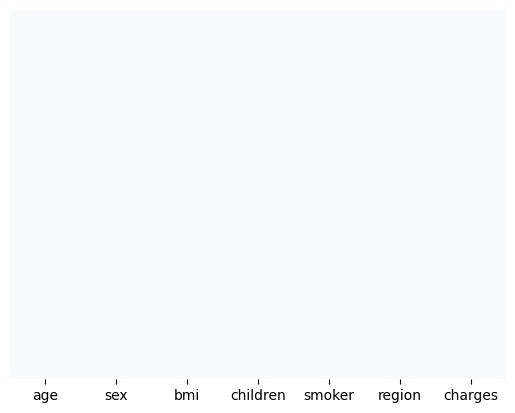

In [8372]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [8373]:
# check if there are any Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Feature Engineering

In [8374]:
# Check unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8375]:
# convert categorical variable to numerical
# Define the mapping
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [8376]:
# Check the unique values in the 'smoker' column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8377]:
# Convert categorical variable to numerical 
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [8378]:
# Check unique values in 'region' column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8379]:
region_dummies = pd.get_dummies(df['region'], drop_first = True)
region_dummies

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [8380]:
df = pd.concat([df, region_dummies], axis = 1)
df['northwest'] = df['northwest'].astype(int)
df['southeast'] = df['southeast'].astype(int)
df['southwest'] = df['southwest'].astype(int)
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [8381]:
# Let's drop the original 'region' column 
df.drop(['region'], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


## Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

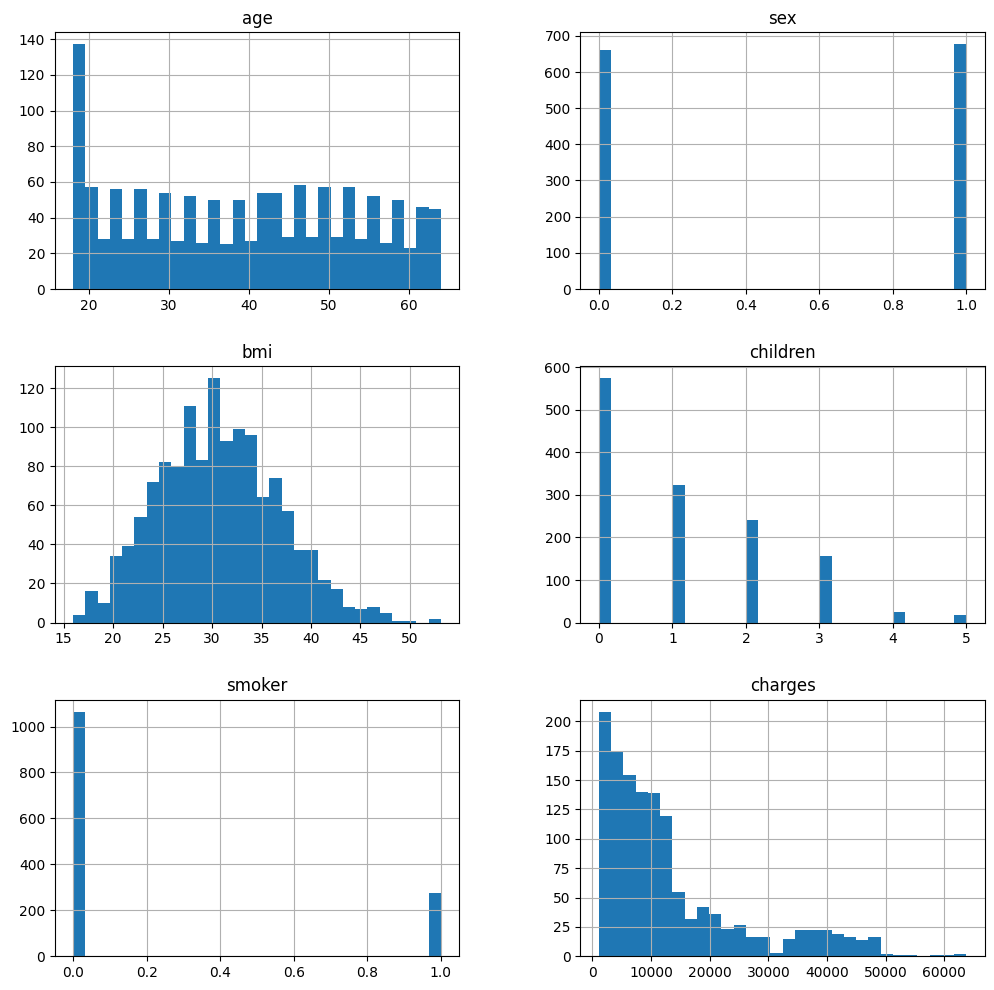

In [8382]:
# Histogram plot
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12))

/Users/erosado/work/text-and-convo-ai-ml-experiments/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erosado/work/text-and-convo-ai-ml-experiments/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erosado/work/text-and-convo-ai-ml-experiments/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erosado/work/text-and-convo-ai-ml-experiments/venv/lib/python3.

<Figure size 1500x600 with 0 Axes>

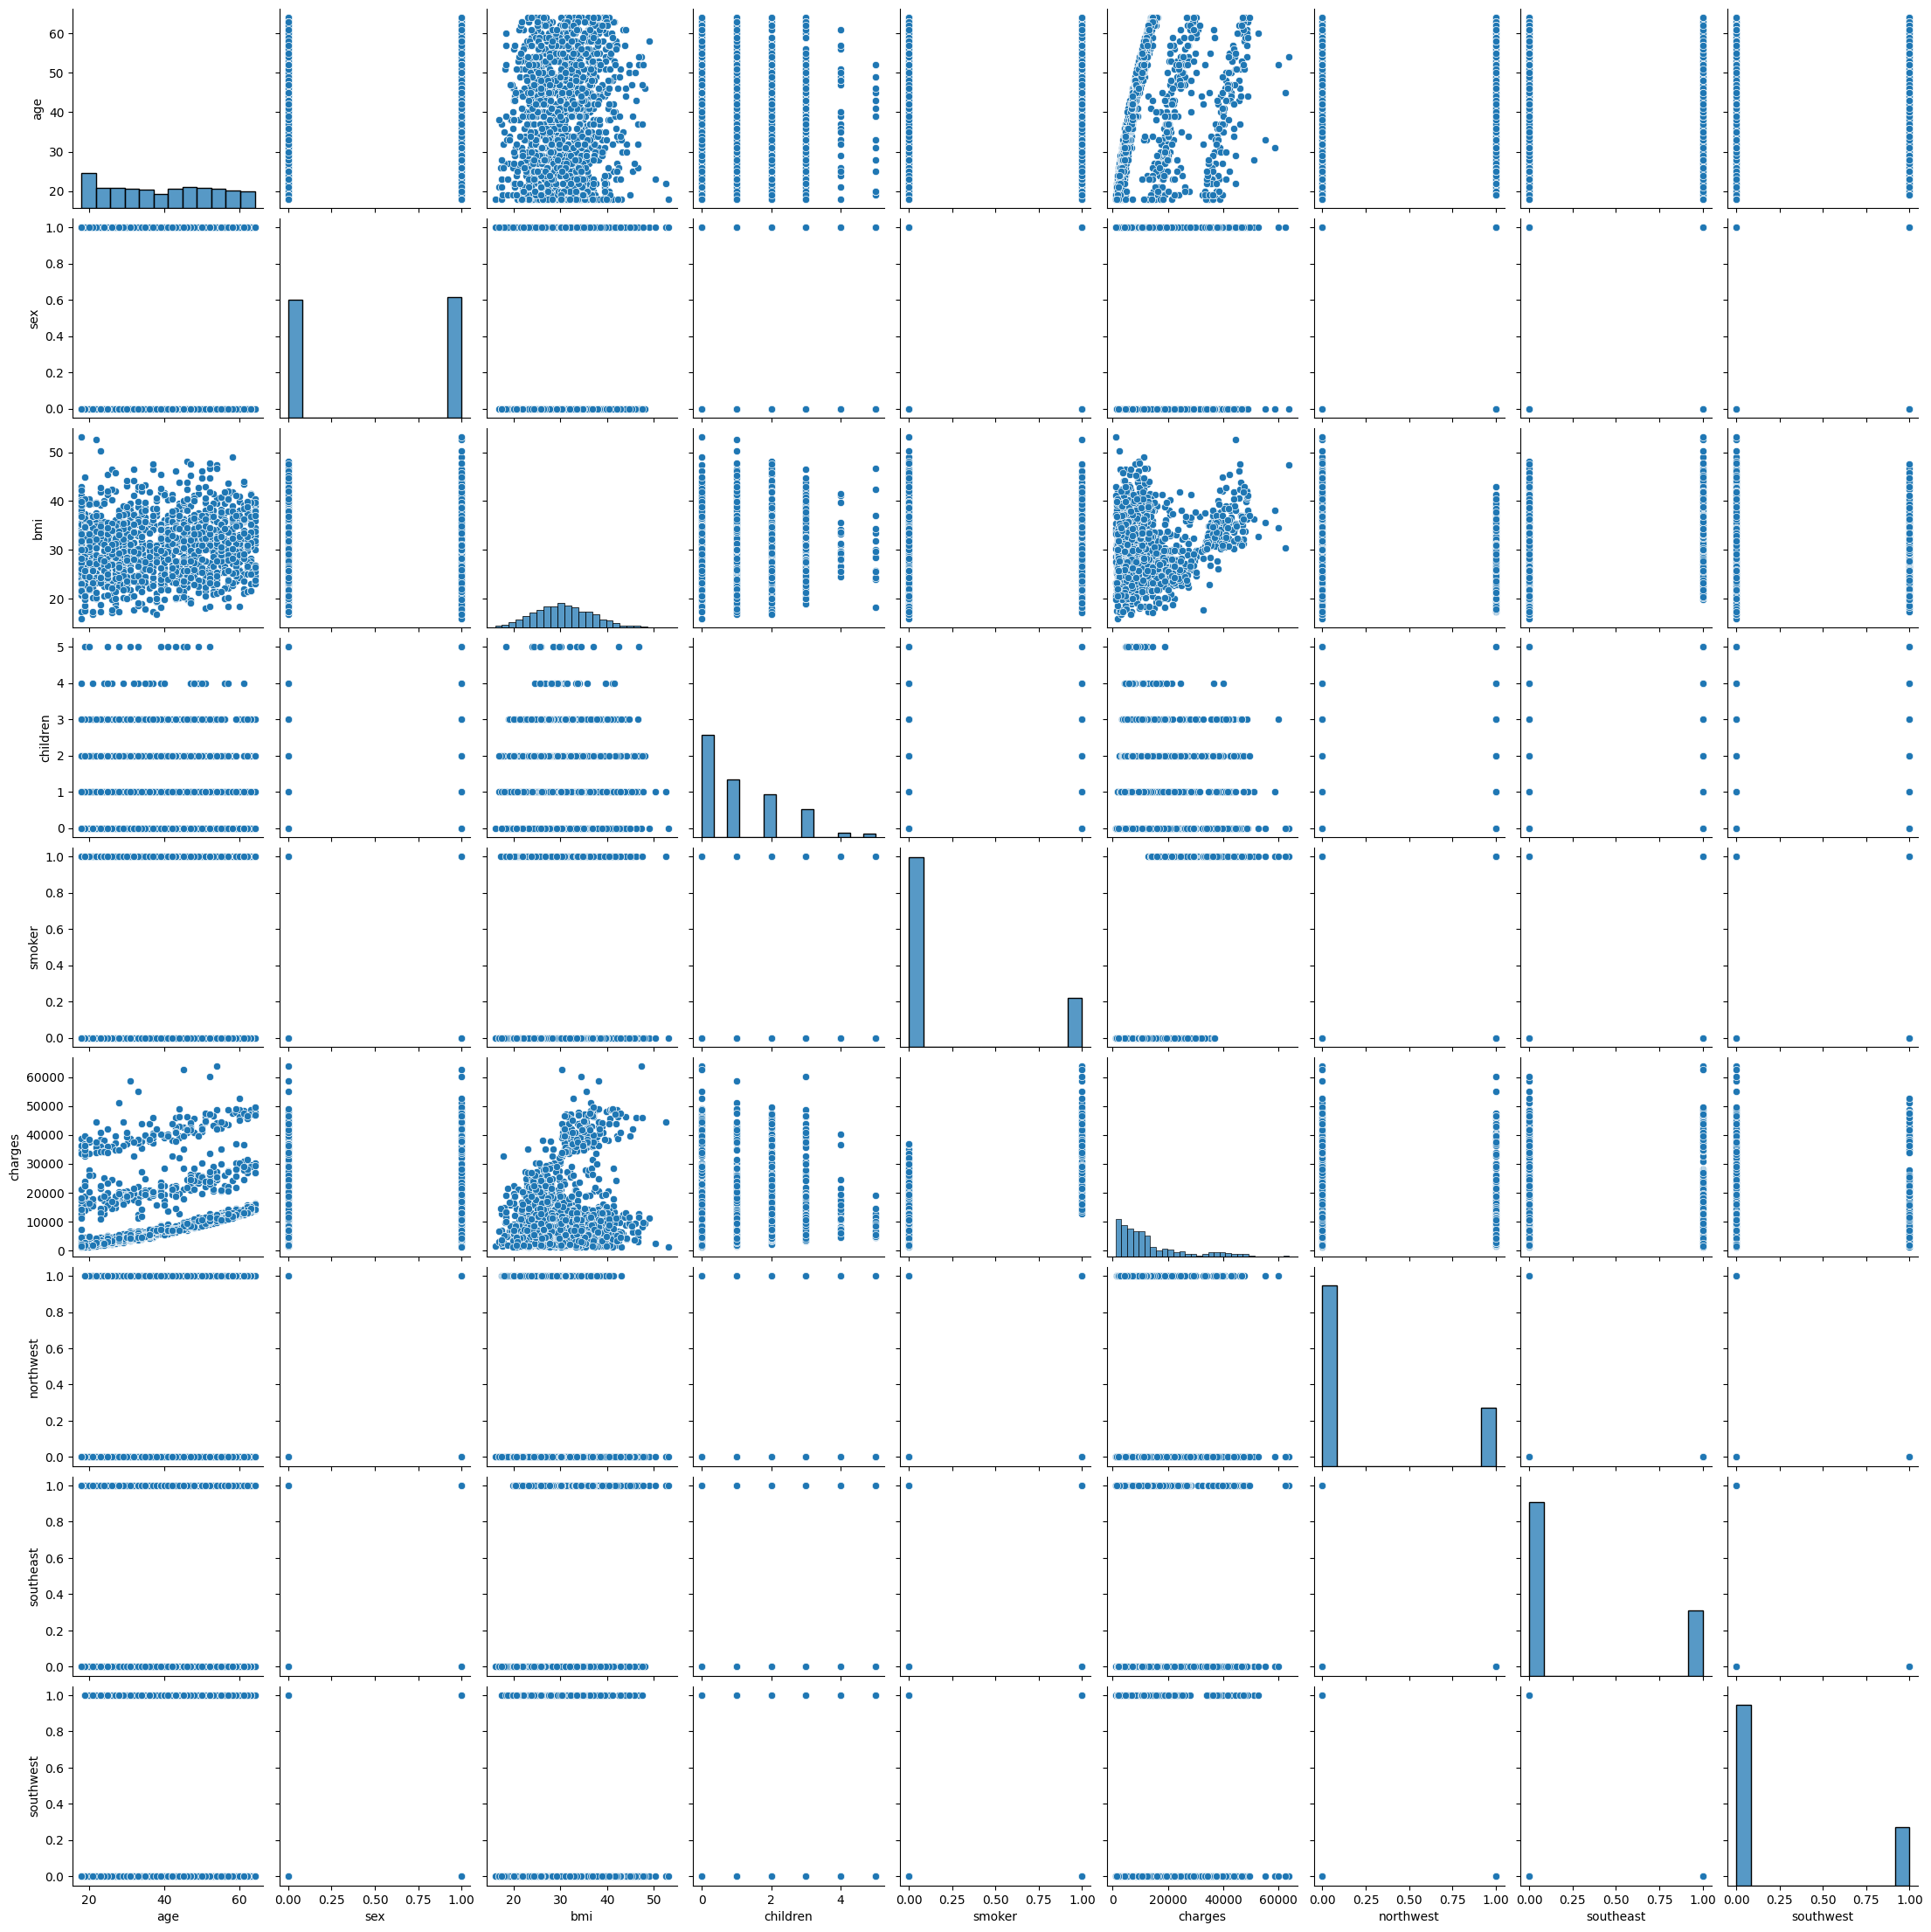

In [8383]:
# SNS pairplot
plt.figure(figsize = (15, 6))
sns.pairplot(df)
plt.show()

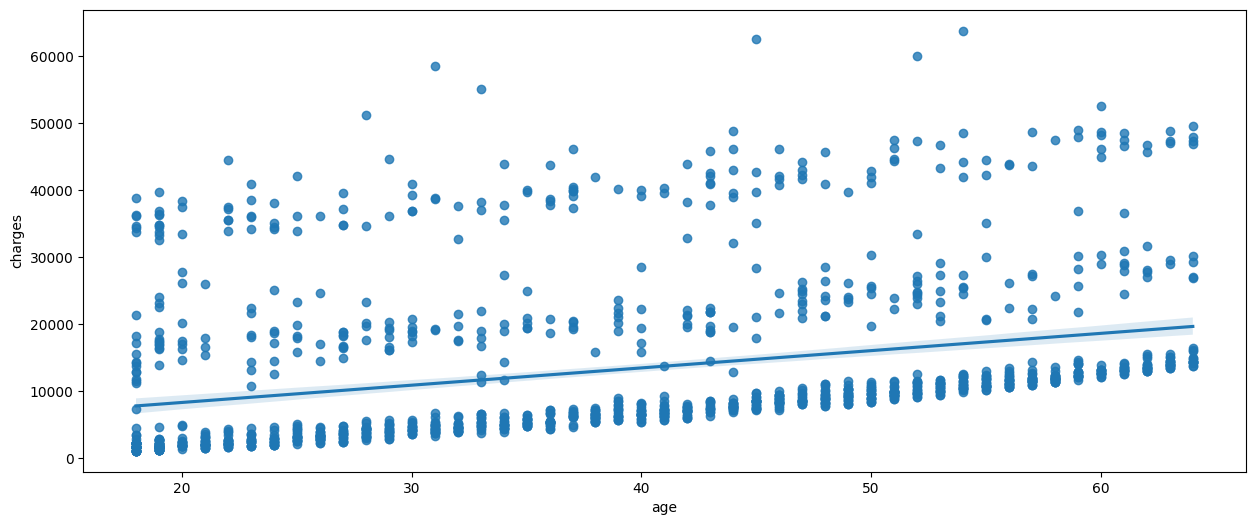

In [8384]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = df)
plt.show()

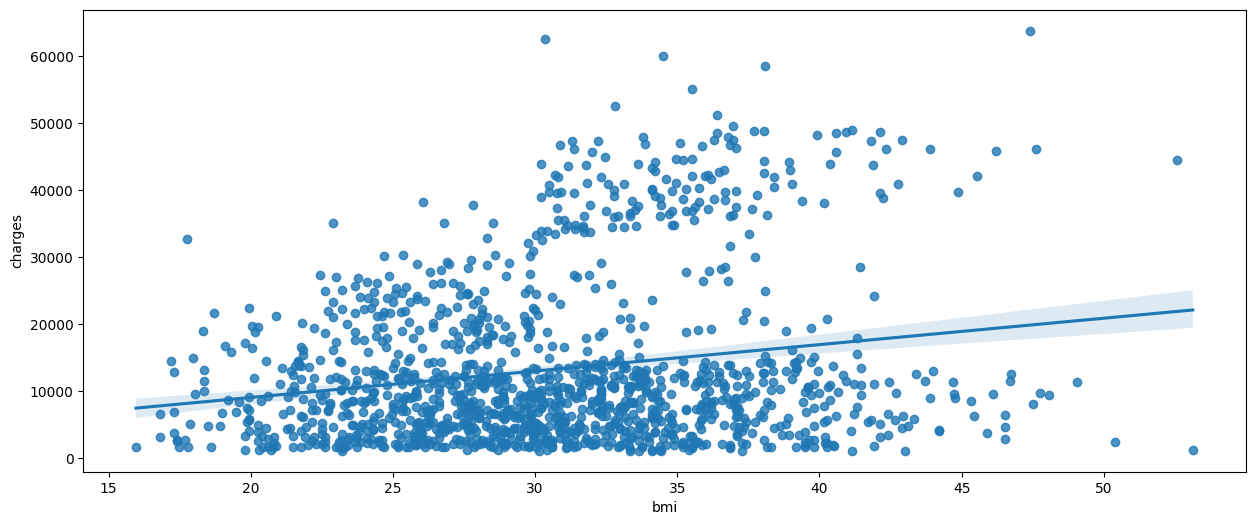

In [8385]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = df)
plt.show()

In [8386]:
df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

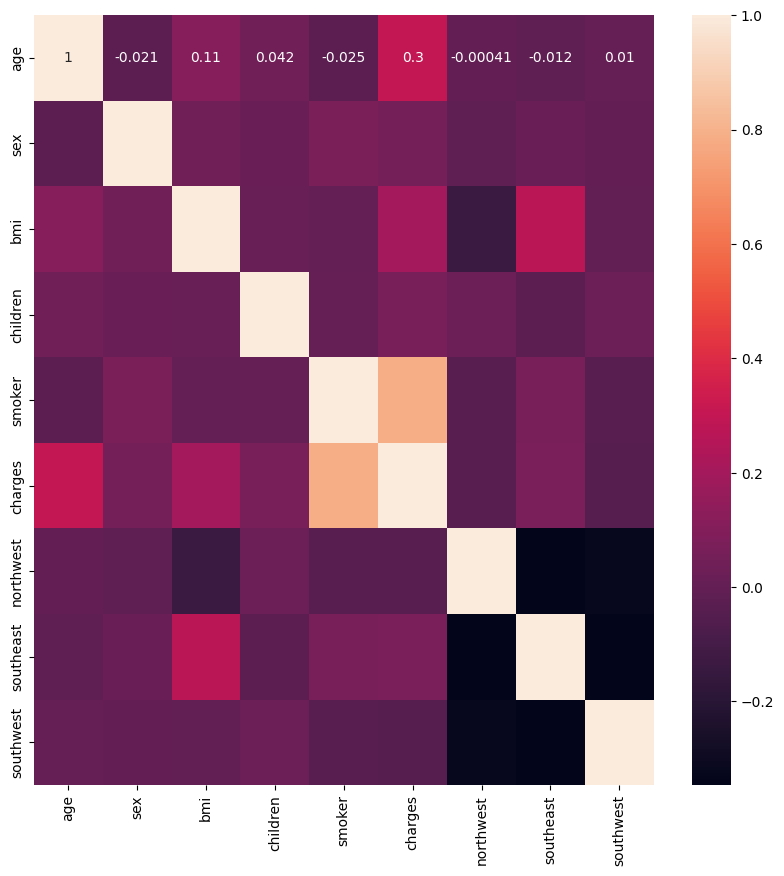

In [8387]:
# Calculate and plot the correlation matrix
# Which feature has the most positive correlation with charges?
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True)

## Create Training and Test Sets

In [8388]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [8389]:
X = df.drop(columns = ["charges"])
y = df["charges"]

In [8390]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [8391]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8392]:
X.shape

(1338, 8)

In [8393]:
y.shape

(1338,)

In [8394]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [8395]:
y = y.reshape(-1,1)

In [8396]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [8397]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [8398]:
# Split the data 80/20 with random state of 10
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_trainset.shape)
print(X_testset.shape)

(1070, 8)
(268, 8)


## Train and Evaluate Linear Regression Model

In [8399]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_trainset, y_trainset)

LinearRegression()

In [8400]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_testset, y_testset)
regresssion_model_sklearn_accuracy

0.6953287124633789

In [8401]:
y_predict = regresssion_model_sklearn.predict(X_testset)

In [8402]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_testset)

In [8403]:
k = X_testset.shape[1]
n = len(X_testset)
n

268

In [8404]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6536.847 
MSE = 42730364.0 
MAE = 4555.099 
R2 = 0.6953287124633789 
Adjusted R2 = 0.6859180163232517


This model did alright, but the goal is to get closer to an R2 of 0.8

## Train and Evaluate NN-Based Regression Model

In [8405]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score

# Convert numpy arrays to torch tensors
X_trainset = torch.tensor(X_trainset, dtype=torch.float32)
y_trainset = torch.tensor(y_trainset, dtype=torch.float32)
X_testset = torch.tensor(X_testset, dtype=torch.float32)
y_testset = torch.tensor(y_testset, dtype=torch.float32)

In [8406]:
# Define the neural network model with hidden layers and dropout
class NeuralNetworkLinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.5):
        super(NeuralNetworkLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define the input dimension (8 features), hidden dimensions, and output dimension (1 target value)
input_dim = 8
hidden_dim1 = 150
hidden_dim2 = 50
output_dim = 1
dropout_rate = 0.5

# Instantiate the model
model = NeuralNetworkLinearModel(input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate)
print(model)

NeuralNetworkLinearModel(
  (fc1): Linear(in_features=8, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [8407]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8408]:


def train_model(current_model, criterion, optimizer, patience=50, num_epochs=1000):
    train_losses = []
    val_losses = []
    
    # Training loop
    best_loss = float('inf')
    epochs_no_improve = 0
    for epoch in range(num_epochs):
        # Set model to training mode (this activates dropout)
        current_model.train()
        
        # Forward pass: Compute predicted y by passing X_trainset to the model
        outputs = current_model(X_trainset)
        loss = criterion(outputs, y_trainset)
        
        # Backward pass: Compute gradient of the loss with respect to model parameters
        optimizer.zero_grad()
        loss.backward()
        
        # Update the model parameters
        optimizer.step()

        # Record training loss
        train_losses.append(loss.item())
        
        # Early stopping
        current_model.eval()
        with torch.no_grad():
            val_outputs = current_model(X_testset)
            val_loss = criterion(val_outputs, y_testset)

        # Record validation loss
        val_losses.append(val_loss.item())

        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    print('Training complete')

    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss over Epochs')
    plt.show()

    # Evaluate the model on the test set
    current_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        y_pred = current_model(X_testset)
        test_loss = criterion(y_pred, y_testset)
        print(f'Test Loss: {test_loss.item():.4f}')

    

    return y_pred, loss

In [8409]:
def evaluate_model(y_pred):
    # Convert predictions and true values to numpy arrays
    y_pred_np = y_pred.numpy()
    y_testset_np = y_testset.numpy()

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_testset_np, y_pred_np)
    print(f'Mean Squared Error (MSE): {mse:.4f}')

    # Compute Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

    r2 = r2_score(y_testset_np, y_pred_np)
    print(f'R-squared (R²): {r2:.4f}')

Epoch [100/1000], Loss: 0.5334, Val Loss: 0.3789
Epoch [200/1000], Loss: 0.4123, Val Loss: 0.2764
Epoch [300/1000], Loss: 0.3778, Val Loss: 0.2502
Epoch [400/1000], Loss: 0.3547, Val Loss: 0.2384
Epoch [500/1000], Loss: 0.3325, Val Loss: 0.2278
Epoch [600/1000], Loss: 0.3190, Val Loss: 0.2251
Epoch [700/1000], Loss: 0.3235, Val Loss: 0.2194
Epoch [800/1000], Loss: 0.3046, Val Loss: 0.2170
Early stopping at epoch 832
Training complete


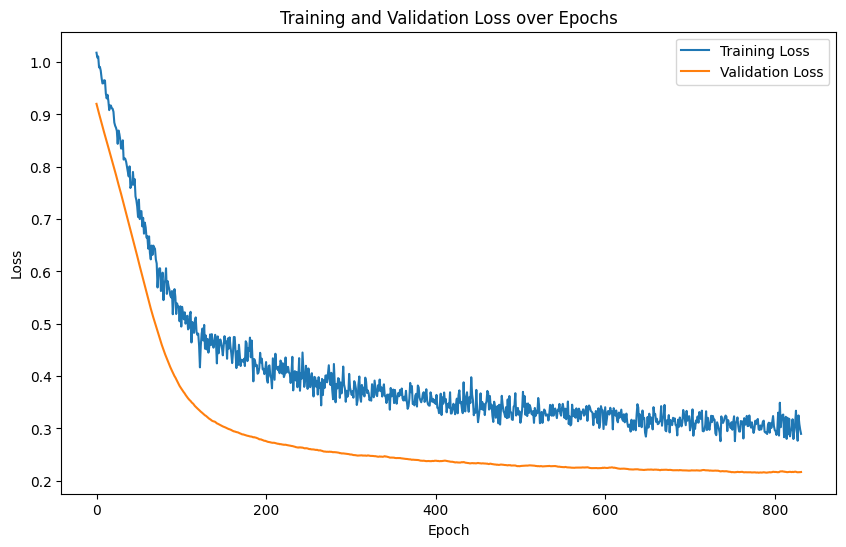

Test Loss: 0.2168


In [8410]:
y_pred, loss = train_model(model, criterion, optimizer, patience=50, num_epochs=1000)

In [8411]:
evaluate_model(y_pred)

Mean Squared Error (MSE): 0.2168
Root Mean Squared Error (RMSE): 0.4656
R-squared (R²): 0.7735
